In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"


# Feature Selection

Feature selection techniques are methods that allows us to select features which could potentially increase the performance of our models. By adding this preprocessing step prior to modeling we are able to build simpler models which leads to faster model training and reduction in model complexity. 

Techniques under feature selection are usually divided into 3 categories.

1. **Filter Methods**

Techniques that fall under this utilizes statistical tests in order to "score" or determine the importance of a feature. One advantage of using this technique is that it is not dependent on the machine learning algorithm being used. Meaning after preprocessing data using filter method the processed data can be consumed by any machine learning algorithm. 
A few techniques that fall under this category are: 
- Correlation - corelation between features are calculated and features above a certain threshold are removed 
- Chi-Square - evaluates the likelihood of correlation between categorical features based on their frequency distribution. 
- Variance - remove features with low variance based on its distribution (ex. features with only 1 variable)
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Filter_1.png"/>

Image from <a href="https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/">Kaushik S</a>

2. **Wrapper Method**

For the wrapper method a machine learning algorithm is used to find the best features to be used to solve the problem. In this technique a subset of features are fed into the machine learning algorithm and based on the performance, features are reduced or added. This method can be expensive especially if you have a lot of features to iterate over. 

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Wrapper_1.png">
Image from <a href="https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/">Kaushik S</a>

Examples of methods under this category are:
- Forward Selection - Initially we start with no features to build the model and on every iteration we keep on adding features that improves the model performance. We stop when additional features no longer improves the model 
- Backward Selection - Compared to foward selection which starts with no features, this method uses all features initially and removes the least significant feature at every iteration


You can read more <a href="https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/">here</a>

3. **Embedded Methods**

This method means that the machine learning algorithm already uses a feature selection method on training. For exmaple, logistic regression has L1 (Lasso) and L2 (Ridge) regularization as part of the algorithm. Regularization works by reducing the weights or coefficient of the features in effect some form of feature selection is already embedded during training. 

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Embedded_1.png">
Image from <a href="https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/">Kaushik S</a>

# Feature Selection Example

In this notebook we will discuss a few filter and wrapper methods since we already had a lecture on using logistic regression which is an example of using an embedded method for feature selection. We will be using the wine dataset for this.

In [10]:
wine_df = pd.read_csv("winequality-red.csv")
wine_df['quality_classif'] = wine_df.quality.apply(lambda x: 1 if x >= 7 else 0)

X = wine_df.loc[:, 'fixed acidity': 'alcohol']
y = wine_df['quality_classif']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train ",X_train.shape)
print("Test ",X_test.shape)

Train  (1279, 11)
Test  (320, 11)


## Filter Method Using Correlation

To calculate the correlation matrix, we will use the `corr` method available in pandas. By default this calculate the pearson correlation.

<AxesSubplot:>

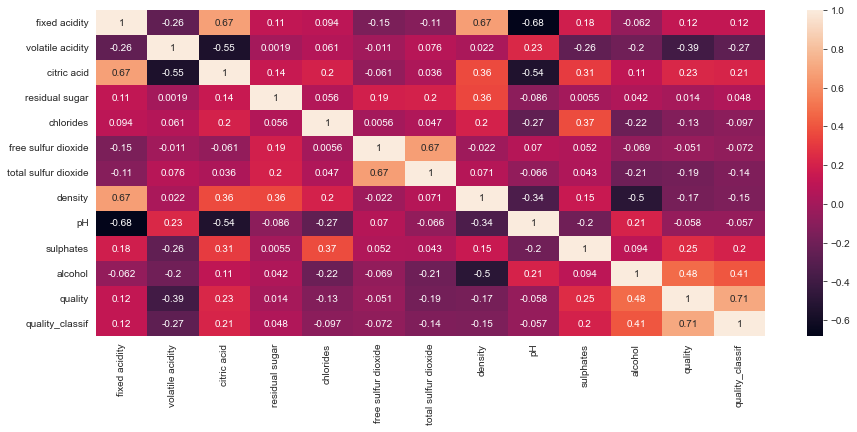

In [11]:
df_corr = wine_df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(df_corr, annot=True, )

One approach using correlation is to get features that are highly correlated to our target variable. The code below shows that we are getting feature with > .2 correlation coefficient with resepect to our target variable `quality_classif`. Take note that .2 is an arbitrary value, this can be changed and tweaked to find which are the top features that will give the best performance.

In [12]:
threshold = .2
corr_target = df_corr['quality_classif'].abs()
selected_feat = corr_target[corr_target > threshold].index
wine_df[selected_feat]

,volatile acidity,citric acid,alcohol,quality,quality_classif
0,0.700,0.00,9.4,5,0
1,0.880,0.00,9.8,5,0
2,0.760,0.04,9.8,5,0
3,0.280,0.56,9.8,6,0
4,0.700,0.00,9.4,5,0
...,...,...,...,...,...
1594,0.600,0.08,10.5,5,0
1595,0.550,0.10,11.2,6,0
1596,0.510,0.13,11.0,6,0
1597,0.645,0.12,10.2,5,0


Another approach is to remove highly correlated features. For example, we can see that fixed acidity and citric acid has a correlated of .67 which is high. To simplify our model we select only 1 feature from the 2 and drop the other. 

In [13]:
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_classif
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


The code below removes correlated features based on a threshold. The threshold can be tweaked to find the best performing model.

In [14]:
#drop target variable as part of the feature selection
df_corr = df_corr.drop(labels="quality_classif", axis=1)

correlated_features = set()
threshold = .5
for i in range(len(df_corr.columns)):
    for j in range(i):
        #print(i, ' ', j, df_corr.columns[i], '-', df_corr.columns[j])
        if abs(df_corr.iloc[i, j]) > threshold:
            colname = df_corr.columns[i]
            #print(f"\t {colname}")
            correlated_features.add(colname)

print(correlated_features)
wine_df.drop(labels=correlated_features, axis=1)

{'density', 'citric acid', 'pH', 'total sulfur dioxide'}


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality,quality_classif
0,7.4,0.700,1.9,0.076,11.0,0.56,9.4,5,0
1,7.8,0.880,2.6,0.098,25.0,0.68,9.8,5,0
2,7.8,0.760,2.3,0.092,15.0,0.65,9.8,5,0
3,11.2,0.280,1.9,0.075,17.0,0.58,9.8,6,0
4,7.4,0.700,1.9,0.076,11.0,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,0.58,10.5,5,0
1595,5.9,0.550,2.2,0.062,39.0,0.76,11.2,6,0
1596,6.3,0.510,2.3,0.076,29.0,0.75,11.0,6,0
1597,5.9,0.645,2.0,0.075,32.0,0.71,10.2,5,0


## Wrapper Method using Sklearn SequentialFeatureSelector & RFE

### Sequential Feature Selection

The sequential feature selection class provided by Sklearn can be used to do a forward or backward selection method. Paramaters for this class are:
- estimator - the machine learning algorithm to use to find the subset of features 
- n_features_to_select - # of features to select, if none half of features are selected. 0 to 1 values can be passed which represents fraction of features to select
- direction - 'forward' or 'backward', used to control the selection method 
- scoring - metric used to evaluate the model 
- cv - default is 5 fold cross validation



In [15]:
SequentialFeatureSelector?

Init signature:
SequentialFeatureSelector(
    estimator,
    *,
    n_features_to_select=None,
    direction='forward',
    scoring=None,
    cv=5,
    n_jobs=None,
)
Docstring:     
Transformer that performs Sequential Feature Selection.

This Sequential Feature Selector adds (forward selection) or
removes (backward selection) features to form a feature subset in a
greedy fashion. At each stage, this estimator chooses the best feature to
add or remove based on the cross-validation score of an estimator. In
the case of unsupervised learning, this Sequential Feature Selector
looks only at the features (X), not the desired outputs (y).

Read more in the :ref:`User Guide <sequential_feature_selection>`.

.. versionadded:: 0.24

Parameters
----------
estimator : estimator instance
    An unfitted estimator.

n_features_to_select : int or float, default=None
    The number of features to select. If `None`, half of the features are
    selected. If integer, the parameter is the absolute num

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Here we pass in knn as our algorithm used to find the set of best features and in the SequentialFeatureSelector initialization we specify that we want it to give us back 80% of the original features. The `get_support` function returns a list of boolean values which is used to indicate if a feature is part of the selected features or not.

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=.8)
sfs.fit(X_train, y_train)
X_train.columns[sfs.get_support()]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density', 'alcohol'],
      dtype='object')

## Recursive Feature Elimination

RFE is an instance of backward selection, the difference with RFE and SFS is RFE requires that estimator passed on instation to have a `coef_` or `feature_importances_` attribute. These attributes are being used as part of the feature selection. For the example below we will use Logistic Regression since it has the `coef_` attribute. The parameters for RFE are:

- estimator - the machine learning algorithm to use to find the subset of features
- n_features_to_select - # of features to select, if none half of features are selected. 0 to 1 values can be passed which -represents fraction of features to select
- step - the number of features to remove at each step can also be 0 to 1 to represent fraction of features to remove

In [19]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression

In [20]:
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

RFE(estimator=LogisticRegression(), n_features_to_select=5)

Similar to sfs we use the `get_support` method to get the selected features 

In [21]:
X_train.columns[selector.get_support()]

Index(['volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol'], dtype='object')

Instead of arbitrarily choosing the best number of features as part of the parameter we can use the RFECV package

In [22]:
rfecv = RFECV(estimator=estimator, scoring='accuracy')
rfecv.fit(X, y)

C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

RFECV(estimator=LogisticRegression(), scoring='accuracy')

In [31]:
list(rfecv.grid_scores_)

[array([0.865625  , 0.865625  , 0.8625    , 0.8625    , 0.86520376]),
 array([0.853125  , 0.865625  , 0.85625   , 0.8625    , 0.86520376]),
 array([0.859375  , 0.865625  , 0.85625   , 0.8625    , 0.89028213]),
 array([0.865625  , 0.8625    , 0.85625   , 0.865625  , 0.89028213]),
 array([0.865625  , 0.8625    , 0.8875    , 0.865625  , 0.89028213]),
 array([0.8625    , 0.85625   , 0.8875    , 0.8625    , 0.89028213]),
 array([0.8625    , 0.85625   , 0.8875    , 0.865625  , 0.89028213]),
 array([0.8625    , 0.85625   , 0.8875    , 0.865625  , 0.89028213]),
 array([0.8625    , 0.846875  , 0.884375  , 0.86875   , 0.89028213]),
 array([0.875     , 0.88125   , 0.9       , 0.85      , 0.87774295]),
 array([0.871875  , 0.8625    , 0.88125   , 0.85      , 0.87147335])]

After running RFECV we can plot the performance of the model based on the number of features selected. The plot below shows that 10 gives us the best performance but it can also be observed that by using 5 we can get almost the same performance as using 10 features.

(0.85, 0.88)

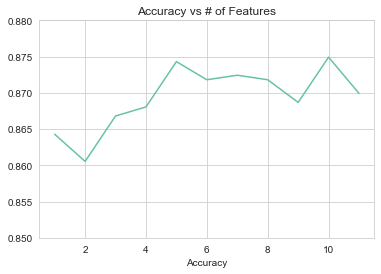

In [93]:
ax = sns.lineplot(x=list(range(1,len(X_train.columns)+1)), y=list(rfecv.grid_scores_))
ax.set_title("Accuracy vs # of Features")
ax.set_xlabel("# of Features")
ax.set_xlabel("Accuracy")
ax.set_ylim(.85, .88)

In [73]:
X_train.columns[rfecv.support_]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

In [77]:
temp_df = pd.DataFrame() 
temp_df['feature'] = X_train.columns
temp_df['rank'] = rfecv.ranking_
temp_df

,feature,rank
0,fixed acidity,1
1,volatile acidity,1
2,citric acid,1
3,residual sugar,1
4,chlorides,1
5,free sulfur dioxide,2
6,total sulfur dioxide,1
7,density,1
8,pH,1
9,sulphates,1


# References

https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/

https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

https://www.linkedin.com/pulse/what-recursive-feature-elimination-amit-mittal